# Graph classification experiment

In [1]:
import numpy as np
import pandas as pd
from pysmiles import read_smiles
import networkx as nx

from torch_geometric.data import DataLoader
import torch

# Utility functions
from graph_classification_utils import *

# GNN models
from graph_classification_gnns import *

# Explainer 
from graph_classification_prototype_explainer import *

# Benchmark explainer
from graph_classification_XGNN import *

## Experiment 1. BA-house shape searching

### 1.1. Data generation

In [2]:
# Generate data 
ba_train_model = ba_house_generator(max_n= 10, 
                          min_n = 5, 
                          edge_rate = 2,
                          r_seed = 0)

ba_test_model = ba_house_generator(max_n= 10, 
                          min_n = 5, 
                          edge_rate = 2,
                          r_seed = 2000)

ba_train_model.dataset_generator(num_graph = 2000)
ba_train_module = DataLoader(ba_train_model.data_list, batch_size = 10)

ba_test_model.dataset_generator(num_graph = 1000)
ba_test_data = ba_test_model.data_list

### 1.2. Multi-simulation

0 Simulation




PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[41, 2, 88]


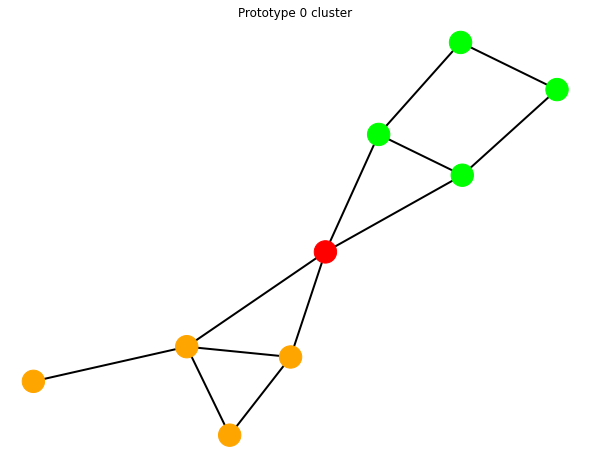

tensor([0.9985], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[332, 387, 1139]


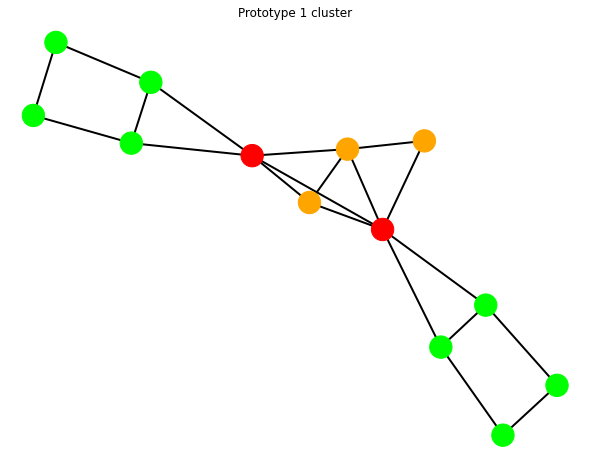

tensor([0.9943], grad_fn=<SigmoidBackward>)


XGNN


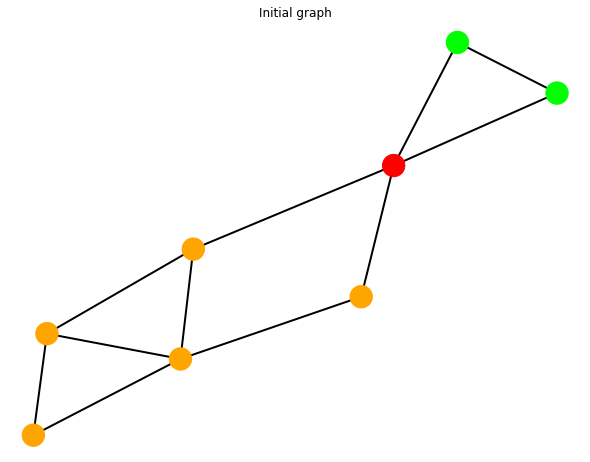

tensor([0.1335], grad_fn=<SigmoidBackward>)


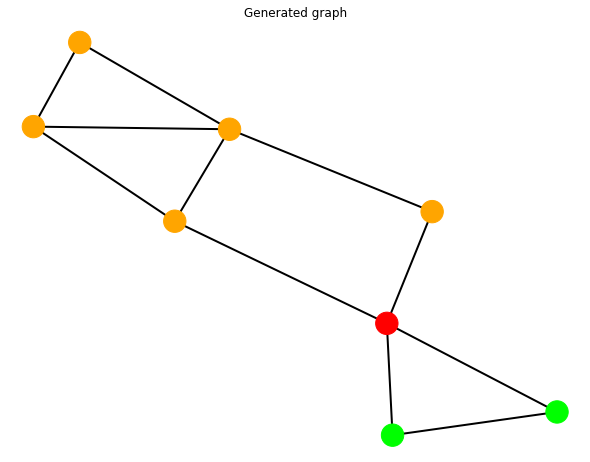

tensor([0.1335], grad_fn=<SigmoidBackward>)


1 Simulation




PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[2, 41, 176]


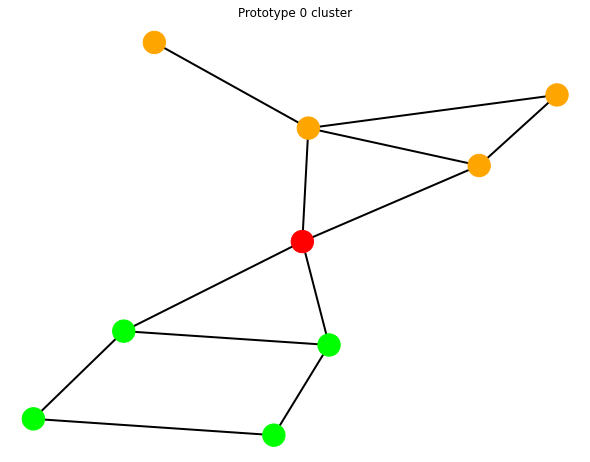

tensor([0.9978], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[1974, 58, 1591]


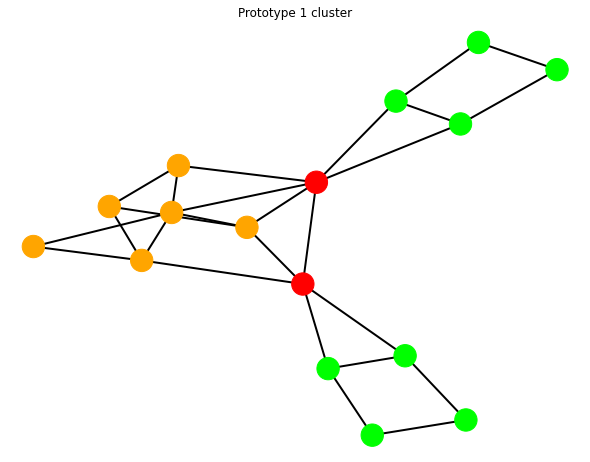

tensor([0.9995], grad_fn=<SigmoidBackward>)


XGNN


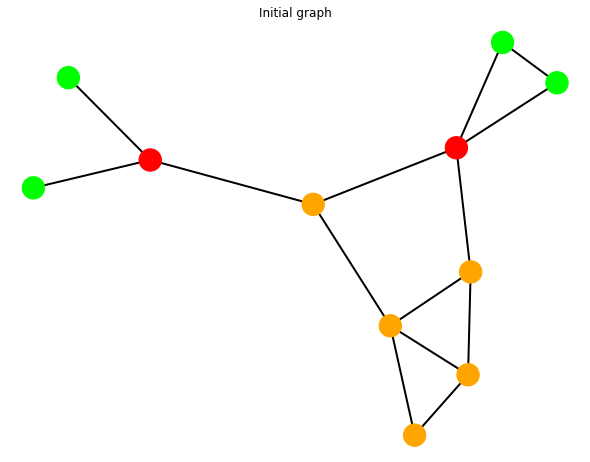

tensor([0.0178], grad_fn=<SigmoidBackward>)


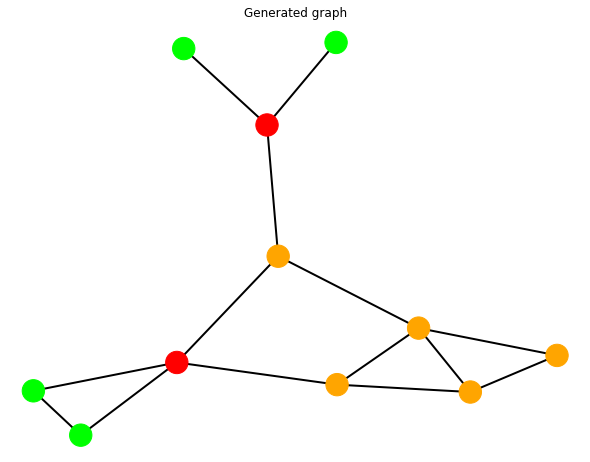

tensor([0.0178], grad_fn=<SigmoidBackward>)


2 Simulation




PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[41, 2, 15]


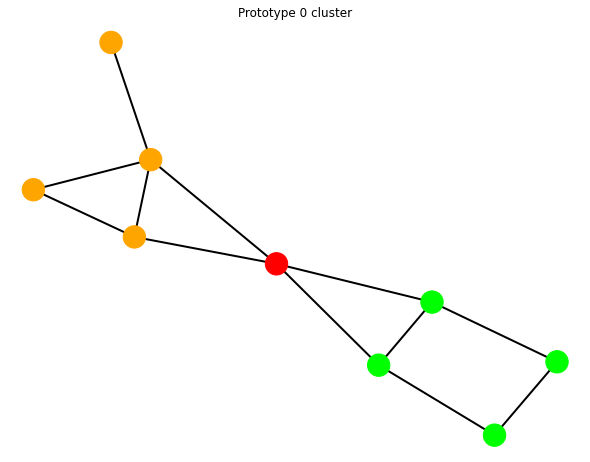

tensor([0.9984], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[58, 332, 1139]


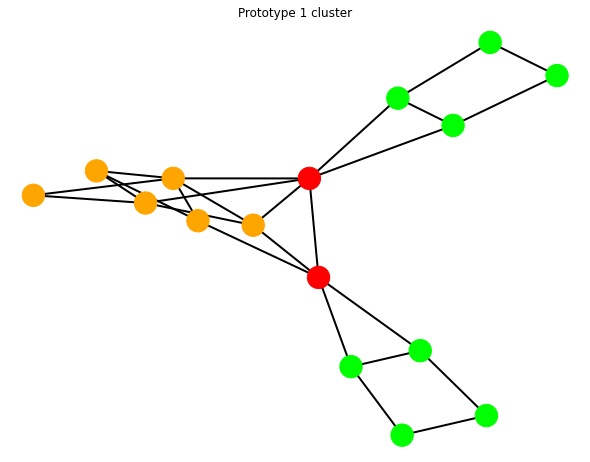

tensor([0.9995], grad_fn=<SigmoidBackward>)


XGNN


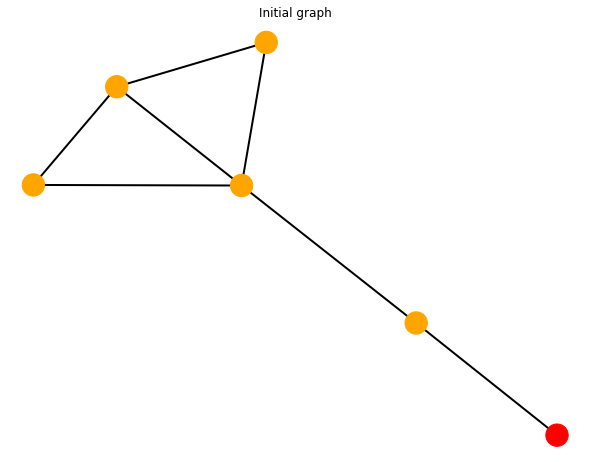

tensor([2.7571e-05], grad_fn=<SigmoidBackward>)


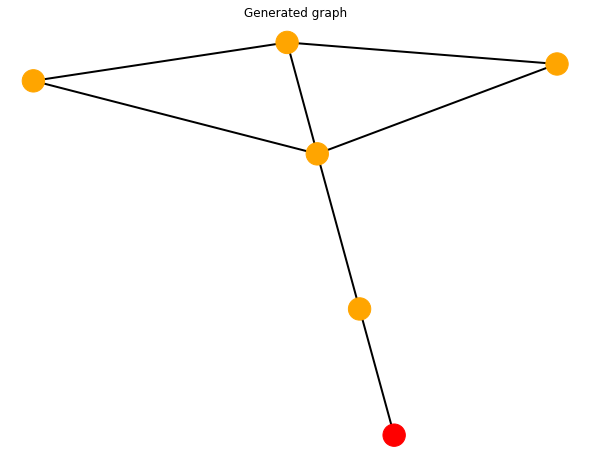

tensor([2.7571e-05], grad_fn=<SigmoidBackward>)


3 Simulation




PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[41, 2, 15]


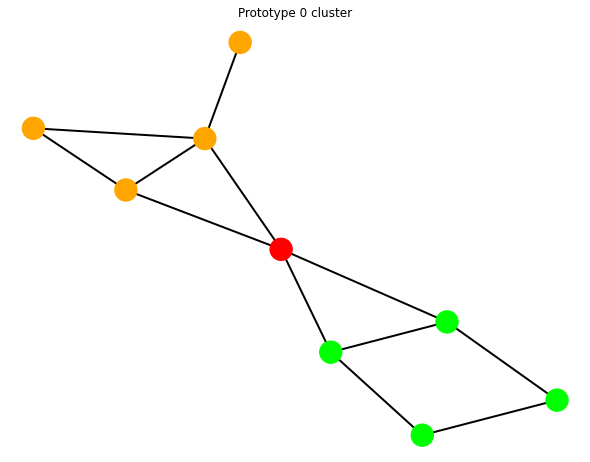

tensor([0.9990], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[1139, 387, 332]


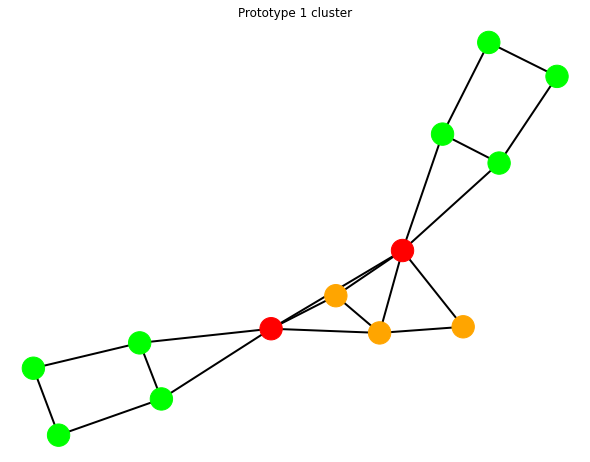

tensor([0.9943], grad_fn=<SigmoidBackward>)


XGNN


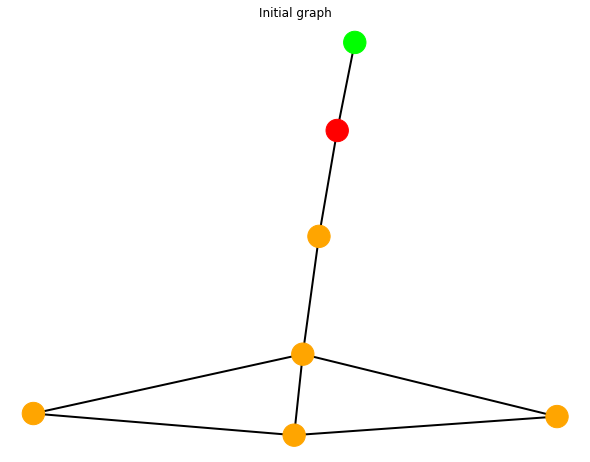

tensor([0.0002], grad_fn=<SigmoidBackward>)


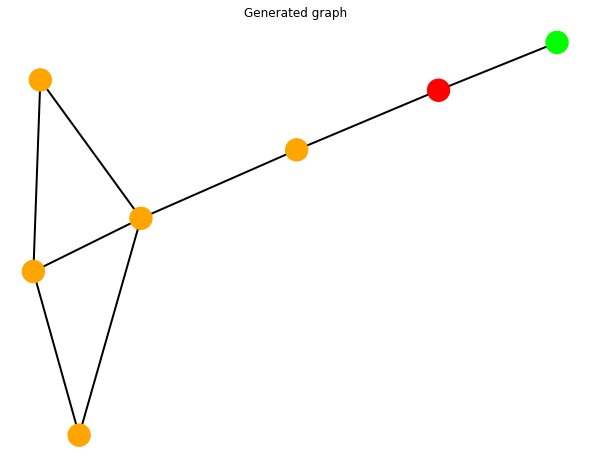

tensor([0.0002], grad_fn=<SigmoidBackward>)


4 Simulation




PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[41, 2, 88]


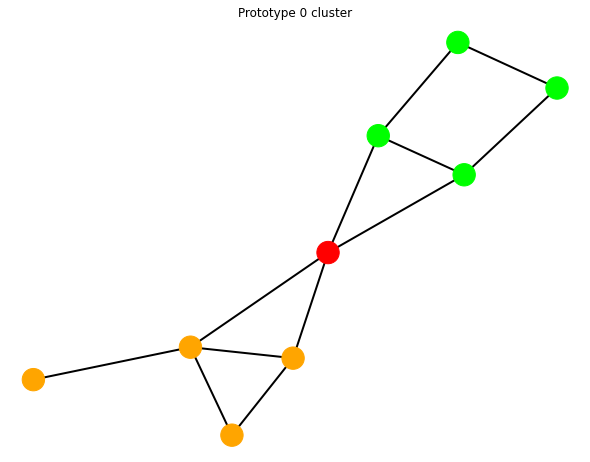

tensor([0.9979], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[1142, 387, 1139]


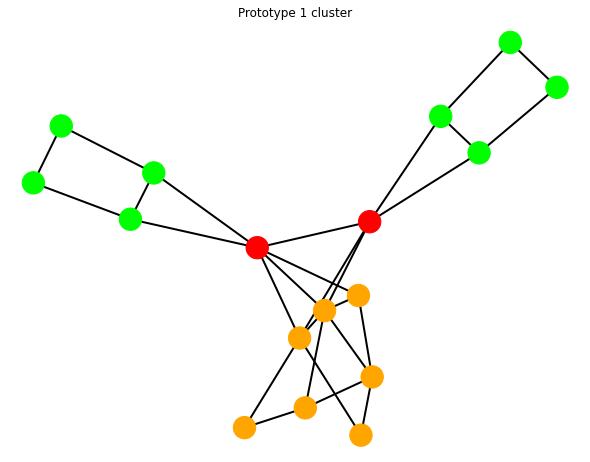

tensor([0.9999], grad_fn=<SigmoidBackward>)


XGNN


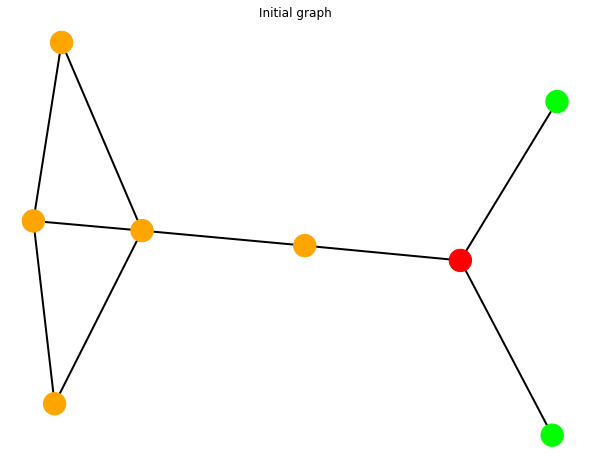

tensor([0.3646], grad_fn=<SigmoidBackward>)


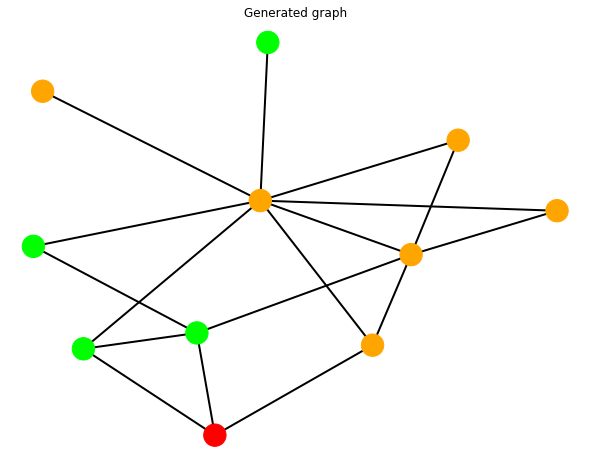

tensor([0.6817], grad_fn=<SigmoidBackward>)




In [23]:
for i in range(5) : 
    print("{0} Simulation".format(i))
    print("\n")
    house_gnn = GCN_Conv(dataset = ba_train_model.data_list[0], latent_dim = [32, 32])

    house_gnn = ba_house_training(model = house_gnn, 
                                 data_module = ba_train_module, 
                                 test_data = ba_test_data, 
                                 device = "cpu", epochs = 30)

    house_explainer = prototype_explanation(gnn_model = house_gnn, 
                                  dataset = ba_train_model.data_list, 
                                  data_name="ba_house")
    print("\n")
    print("PAGE")

    house_result = house_explainer.generate_prototype(label = 1, 
                                            k = 3, n_components = 2, 
                                            n_iter = 15, 
                                            cluster_index = 0, 
                                            max_epochs = 100)
    print(house_gnn(house_result[0], training_with_batch = False))
    print("\n")

    house_result = house_explainer.generate_prototype(label = 1, 
                                            k = 3, n_components = 2, 
                                            n_iter = 15, 
                                            cluster_index = 1, 
                                            max_epochs = 100)
    print(house_gnn(house_result[0], training_with_batch = False))
    print("\n")
    print("XGNN")
    
    XGNN = XGNN_model(dataset = ba_train_model.data_list[0], 
           candidates = torch.diag(torch.ones(3)), 
           data_type = "ba_house", 
           gcn_latent_dim = [16, 24, 32])

    trained_XGNN, final_graph = train_XGNN(explainer = XGNN, 
                                  gnn_model = house_gnn, 
                                  initial_n = 5, 
                                  max_node_n = 15, 
                                  lambda_1 = 1, 
                                  lambda_2 = 1, 
                                  m = 10, 
                                  label = 1, 
                                  init_type = i, 
                                  show_init_g = True)
    print(house_gnn(final_graph, training_with_batch = False))
    print("========================================================================")
    print("\n")

## Experiment 2. Solubility dataset

### 2.1. Data generation

In [4]:
solubility_data = solubility_data_generator(path = "solubility_original_data.csv")
solubility_train_data = solubility_data[:500]
solubility_test_data = solubility_data[500:]

solubility_train_module = DataLoader(solubility_train_data, batch_size = 5)

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded


### 2.2. Multi-Simulation

0 Simulation


Training finished. Explanation begin


PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[360, 575, 212]


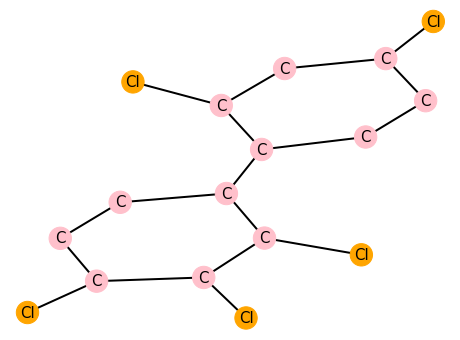

tensor([1.4465e-05], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[562, 342, 159]


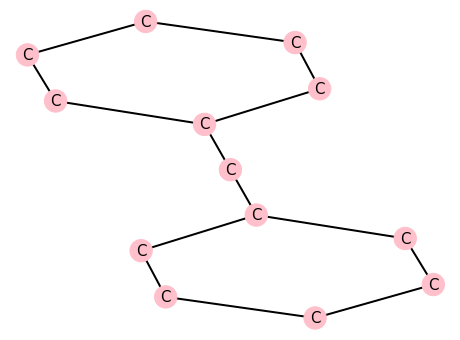

tensor([0.0026], grad_fn=<SigmoidBackward>)


XGNN


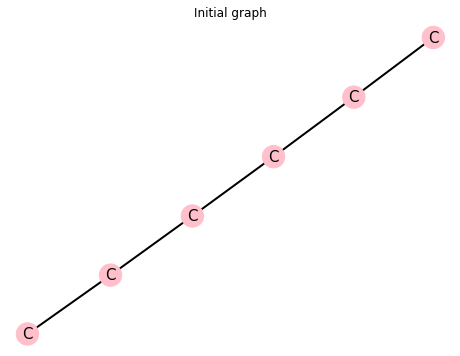

tensor([0.7433], grad_fn=<SigmoidBackward>)


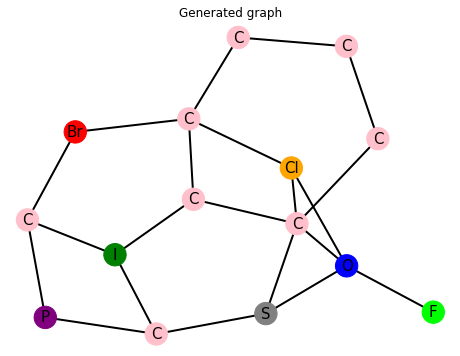

tensor([0.0004], grad_fn=<SigmoidBackward>)


1 Simulation


Training finished. Explanation begin


PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[25, 159, 40]


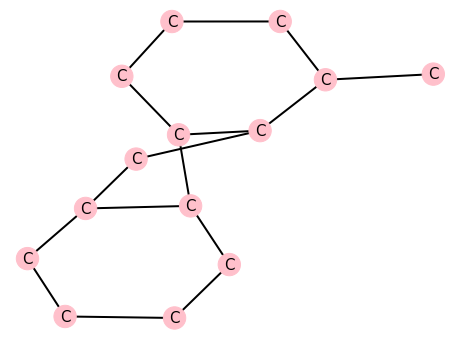

tensor([0.0008], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[157, 414, 5]


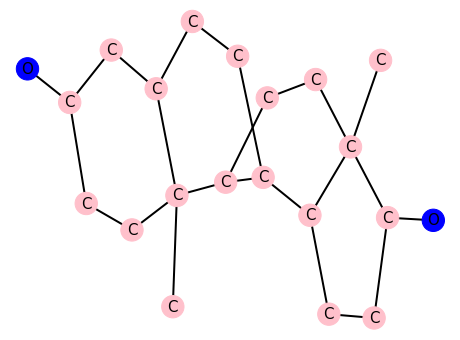

tensor([0.0021], grad_fn=<SigmoidBackward>)


XGNN


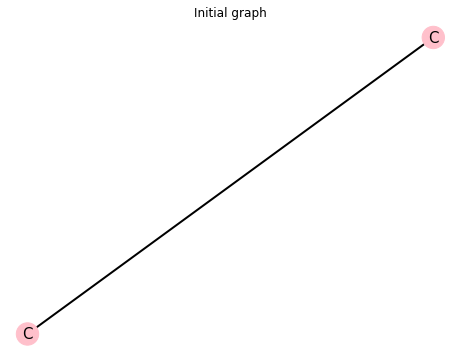

tensor([0.9935], grad_fn=<SigmoidBackward>)


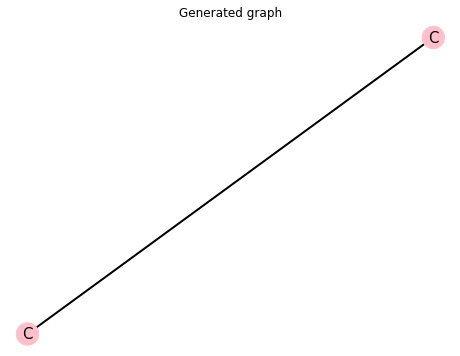

tensor([0.9935], grad_fn=<SigmoidBackward>)


2 Simulation


Training finished. Explanation begin


PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[83, 29, 159]


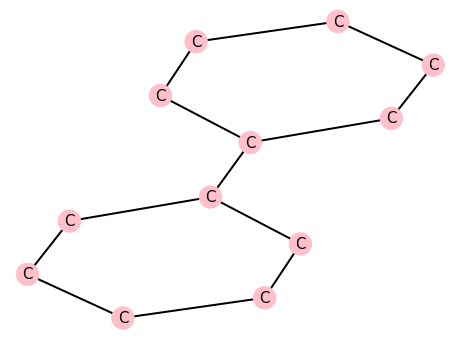

tensor([0.0071], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[657, 15, 335]


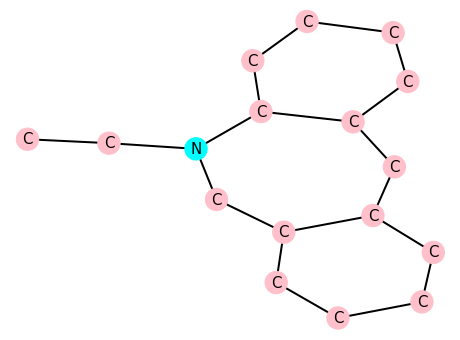

tensor([0.0007], grad_fn=<SigmoidBackward>)


XGNN


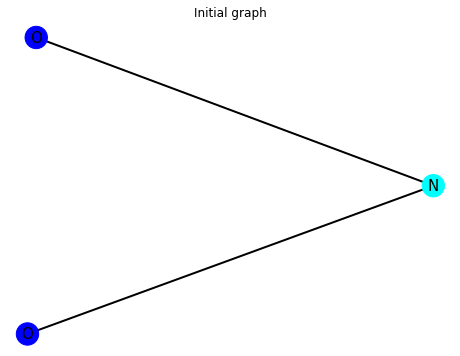

tensor([0.9928], grad_fn=<SigmoidBackward>)


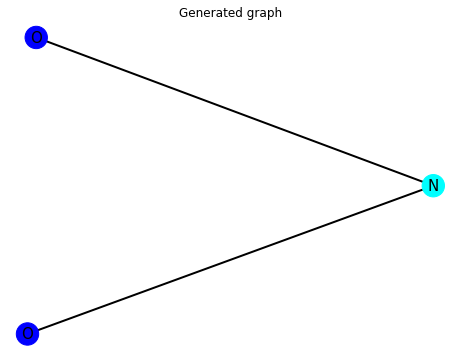

tensor([0.9928], grad_fn=<SigmoidBackward>)


3 Simulation


Training finished. Explanation begin


PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[256, 83, 29]


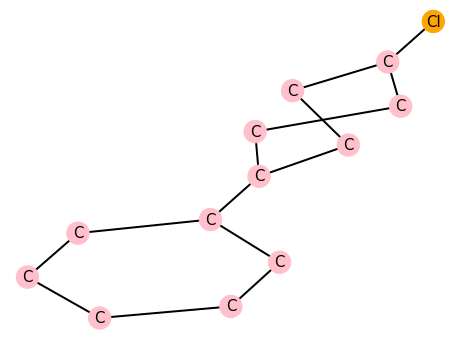

tensor([0.0029], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[570, 288, 445]


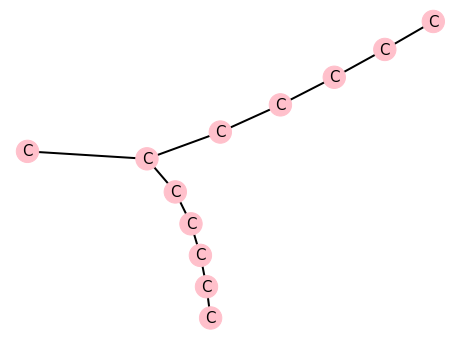

tensor([0.0090], grad_fn=<SigmoidBackward>)


XGNN


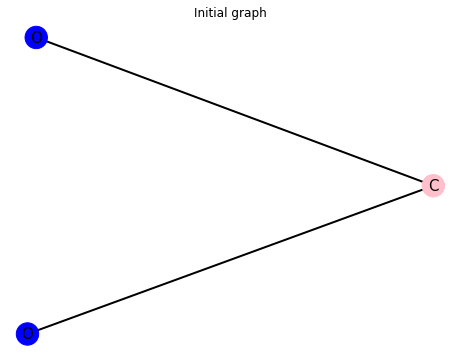

tensor([0.9813], grad_fn=<SigmoidBackward>)


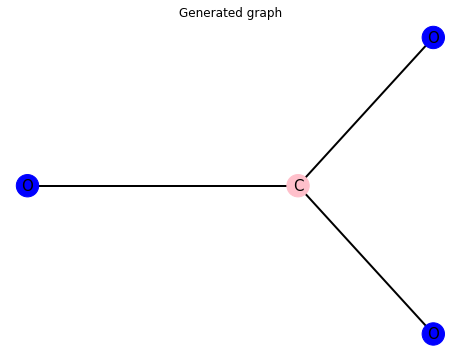

tensor([0.8907], grad_fn=<SigmoidBackward>)


4 Simulation


Training finished. Explanation begin


PAGE
Finished searching nearest graphs. Now searching maximum common subgraphs...
[568, 505, 657]


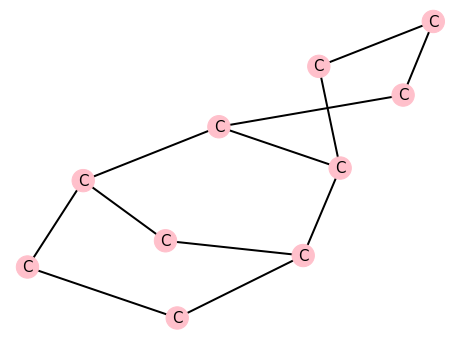

tensor([0.0551], grad_fn=<SigmoidBackward>)


Finished searching nearest graphs. Now searching maximum common subgraphs...
[256, 29, 612]


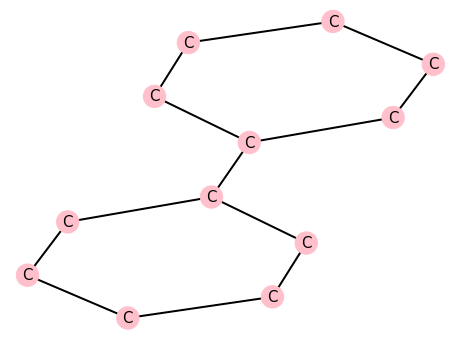

tensor([0.0079], grad_fn=<SigmoidBackward>)


XGNN


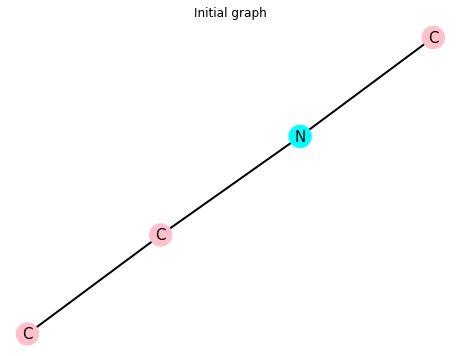

tensor([0.9883], grad_fn=<SigmoidBackward>)


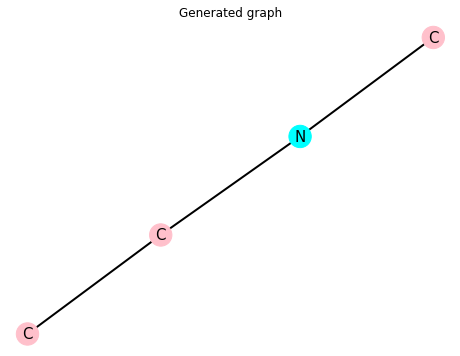

tensor([0.9883], grad_fn=<SigmoidBackward>)




In [12]:
for i in range(5) : 
    print("{0} Simulation".format(i))
    print("\n")
    solubility_gnn = GCN_Conv(dataset = solubility_train_data[0], latent_dim = [32, 32, 32])

    solubility_gnn = solubility_training(model = solubility_gnn, 
                                 data_module = solubility_train_module, 
                                 test_data = solubility_test_data, 
                                 device = "cpu", epochs = 300)

    solubility_explainer = prototype_explanation(gnn_model = solubility_gnn, 
                                  dataset = solubility_data, 
                                  data_name="solubility")
    print("Training finished. Explanation begin")
    print("\n")
    print("PAGE")

    sol_result = solubility_explainer.generate_prototype(label = 0, 
                                            k = 3, n_components = 2, 
                                            n_iter = 15, 
                                            cluster_index = 0, 
                                            max_epochs = 150)
    print(solubility_gnn(sol_result[0], training_with_batch = False))
    print("\n")

    sol_result = solubility_explainer.generate_prototype(label = 0, 
                                            k = 3, n_components = 2, 
                                            n_iter = 15, 
                                            cluster_index = 1, 
                                            max_epochs = 150)
    print(solubility_gnn(sol_result[0], training_with_batch = False))
    print("\n")
    print("XGNN")
    
    XGNN = XGNN_model(dataset = solubility_data[0], 
           candidates = torch.diag(torch.ones(9)), 
           data_type = "solubility", 
           gcn_latent_dim = [16, 24, 32])

    trained_XGNN, final_graph = train_XGNN(explainer = XGNN, 
                                  gnn_model = solubility_gnn, 
                                  initial_n = 5, 
                                  max_node_n = 15, 
                                  lambda_1 = 1, 
                                  lambda_2 = 1, 
                                  m = 10, 
                                  label = 0, 
                                  init_type = i, 
                                  show_init_g = True)
    print(solubility_gnn(final_graph, training_with_batch = False))
    print("========================================================================")
    print("\n")

## Ground Truths

In [ ]:
# Showing the groundtruth 
# 2 & 37
#from torch_geometric
ba_ground_truth = Data(x = torch.tensor([[1, 0, 0], 
                                 [0, 1, 0], 
                                 [0, 1, 0], 
                                 [0, 1, 0], 
                                 [0, 1, 0]], dtype = torch.float), 
                     edge_index = torch.tensor([[0, 1], [1, 0], 
                                               [0, 2], [2, 0], 
                                               [1, 2], [2, 1], 
                                               [1, 3], [3, 1], 
                                               [2, 4], [4, 2], 
                                               [3, 4], [4, 3]], dtype = torch.long).t().contiguous())

solub_ground_truth = Data(x = torch.tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                 [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                 [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                 [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                 [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0, 0, 0, 0], ], dtype = torch.float), 
                     edge_index = torch.tensor([[0, 1], [1, 0], 
                                               [1, 2], [2, 1], 
                                               [2, 3], [3, 2], 
                                               [3, 4], [4, 3], 
                                               [4, 5], [5, 4], 
                                               [0, 5], [5, 0], 
                                               [2, 6], [6, 2], 
                                               [6, 7], [7, 6], 
                                               [7, 8], [8, 7], 
                                               [8, 9], [9, 8], 
                                               [3, 9], [9, 3],
                                               [8, 10], [10, 8],
                                                [10, 11], [11, 10],
                                               [11, 12], [12, 11], 
                                               [9, 13], [13, 9], 
                                               [12, 13], [13, 12], 
                                               [10, 14], [14, 10], 
                                               [14, 15], [15, 14], 
                                               [15, 16], [16, 15], 
                                               [11, 16]], dtype = torch.long).t().contiguous())